# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

'1.5.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [7]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [8]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [9]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [10]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [15]:
df_hp = movies[movies.title.str.contains('Harry Potter', case = False)]
df_hp.sort_values(by=['year'], ascending=True)


,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
count = len(movies[movies['year']== 2015])
print(count)

8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
count = len(movies[(movies['year']>=2000) & (movies['year']<=2018)])
print(count)



114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
countq4 = len(movies[movies['title'] == 'Hamlet'])
print(countq4)

20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
hmlt_df = movies[(movies['title'] == 'Hamlet')&(movies['year']>=2000)]
hmlt_df.sort_values(by=['year'], ascending = True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:

len((cast[(cast['n'].isnull())&(cast['title'] == 'Inception')]))

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [22]:
q7 = len(cast[cast['title']=='Inception'])-len((cast[(cast['n'].isnull())&(cast['title'] == 'Inception')]))
print(q7)

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [23]:
cast_idf=cast[cast['title']=='Inception']
cast_idf.sort_values(by = ['n'], ascending = False).iloc[:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [24]:
cast[cast['name'] == 'Albus Dumbledore']


,title,year,name,type,character,n


In [25]:
cast[cast['character'] == 'Albus Dumbledore']

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [26]:
len(cast[cast['name'] =='Keanu Reeves']['character'].unique())

56

In [27]:
q10_df = cast[(cast['name']=='Keanu Reeves')&(cast['year']>=1999)&(cast['n'].notnull())]
q10_df.sort_values(by = ['year'], ascending = True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [28]:
actor_roles = len(cast[(cast['year'] >= 1950) & (cast['year'] <= 1960) & (cast['type'] == 'actor')])
actress_roles = len(cast[(cast['year'] >= 1950) & (cast['year'] <= 1960) & (cast['type'] == 'actress')])

total_roles = actor_roles + actress_roles
print("Total actor roles:", actor_roles)
print("Total actress roles:", actress_roles)
print("Total actor and actress roles:", total_roles)


Total actor roles: 171302
Total actress roles: 63333
Total actor and actress roles: 234635


In [29]:
actor_roles = len(cast[(cast['year'] >= 2007) & (cast['year'] <= 2017) & (cast['type'] == 'actor')])
actress_roles = len(cast[(cast['year'] >= 2007) & (cast['year'] <= 2017) & (cast['type'] == 'actress')])

total_roles = actor_roles + actress_roles
print("Total actor roles:", actor_roles)
print("Total actress roles:", actress_roles)
print("Total actor and actress roles:", total_roles)


Total actor roles: 922782
Total actress roles: 529631
Total actor and actress roles: 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [30]:
leading_roles_count = len(cast[(cast['year'] >= 2000) & cast['n'].notnull() & (cast['n'] == 1)])
non_leading_roles_count = len(cast[(cast['year'] >= 2000) & cast['n'].notnull() & (cast['n'] > 1)])
support_roles_count = len(cast[(cast['year'] >= 2000) & cast['n'].isnull()])

print("Total number of leading roles:", leading_roles_count)
print("Total number of non-leading roles:", non_leading_roles_count)
print("Total number of support/extra-credit roles:", support_roles_count)


Total number of leading roles: 60568
Total number of non-leading roles: 1001710
Total number of support/extra-credit roles: 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<Axes: >

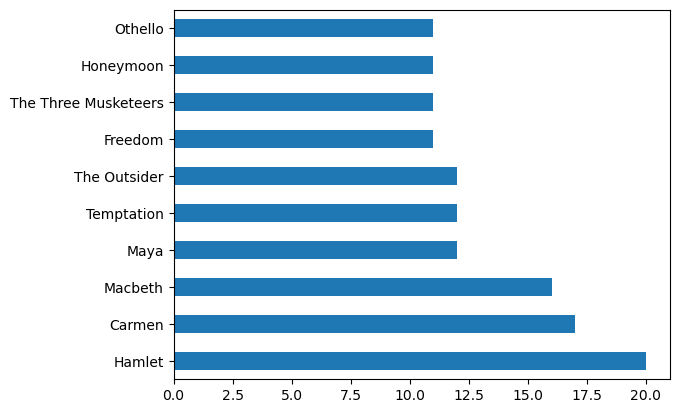

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
movies_2000 = movies[(movies['year']>=2000)&(movies['year']<=2009)]
movies_2000.year.value_counts().sort_values(ascending=False).iloc[:3]


2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

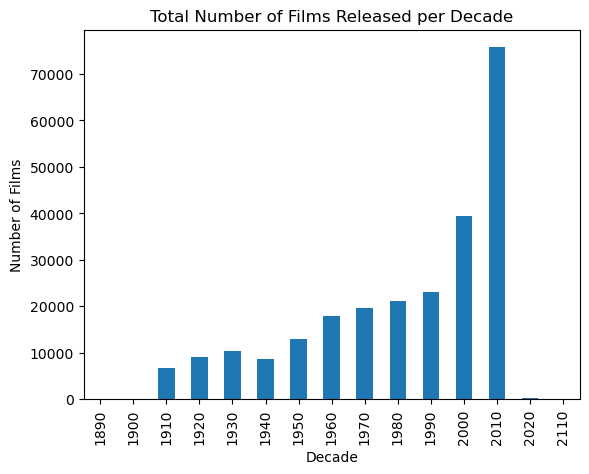

In [34]:
import matplotlib.pyplot as plt

# Extract the decade from the 'year' column
movies['decade'] = (movies['year'] // 10) * 10

# Group the data by decade and count the number of films
films_per_decade = movies['decade'].value_counts().sort_index()

# Plot the total number of films per decade
films_per_decade.plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Total Number of Films Released per Decade')
plt.show()


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
cast['name'].value_counts().sort_values(ascending = False).iloc[:10]

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Lee Phelps         624
Harold Miller      624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64

In [36]:
herself_credits = cast[cast['character'] == 'Herself']
top_10_herself = herself_credits['name'].value_counts().head(10)

print("Top 10 people most often credited as 'Herself' in movie history:")
print(top_10_herself)


Top 10 people most often credited as 'Herself' in movie history:
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64


In [37]:
himself_credits = cast[cast['character'] == 'Himself']
top_10_himself = himself_credits['name'].value_counts().head(10)

print("Top 10 people most often credited as 'Himself' in movie history:")
print(top_10_himself)


Top 10 people most often credited as 'Himself' in movie history:
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [44]:
zombies_roles = cast[cast['character'].str.startswith('Zombie')]
zombies_roles['character'].value_counts().head(10)

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [45]:
police_roles = cast[cast['character'].str.startswith('police')]
police_roles['character'].value_counts().head(10)

policeman                     9
police officer                6
policejn? prezident Hancke    1
policewoma                    1
police investigator Liz       1
police detective D            1
police officer Eastwood       1
police detective              1
police detective C            1
police detective E            1
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<Axes: xlabel='year'>

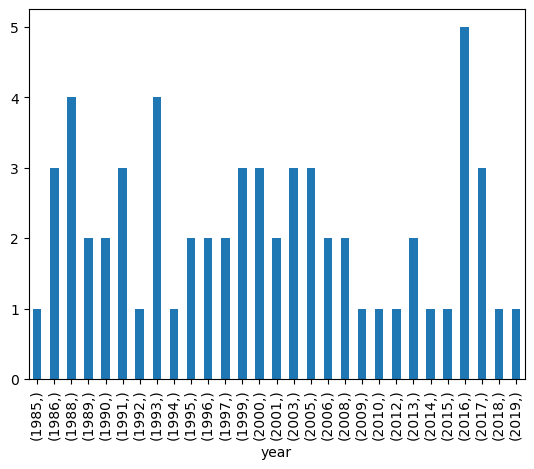

In [57]:
kr = cast[cast['name']=='Keanu Reeves'].value_counts(['year']).sort_index()
kr.plot(kind = 'bar')



### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


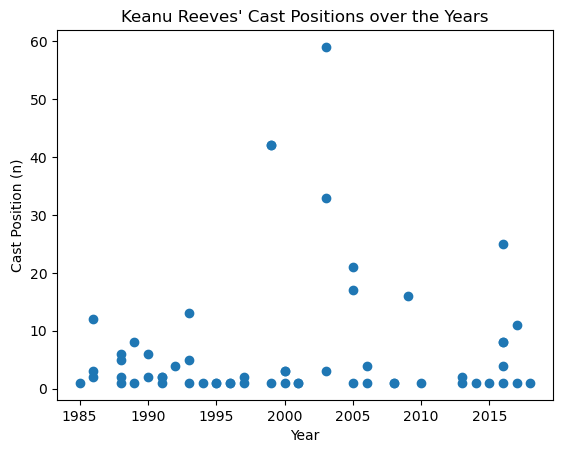

In [59]:
import matplotlib.pyplot as plt

# Filter the DataFrame for 'Keanu Reeves'
keanu_roles = cast[cast['name'] == 'Keanu Reeves']

# Plot the cast positions (n-values) over the years
plt.plot(keanu_roles['year'], keanu_roles['n'], 'o')
plt.xlabel('Year')
plt.ylabel('Cast Position (n)')
plt.title("Keanu Reeves' Cast Positions over the Years")
plt.show()


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/215599530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


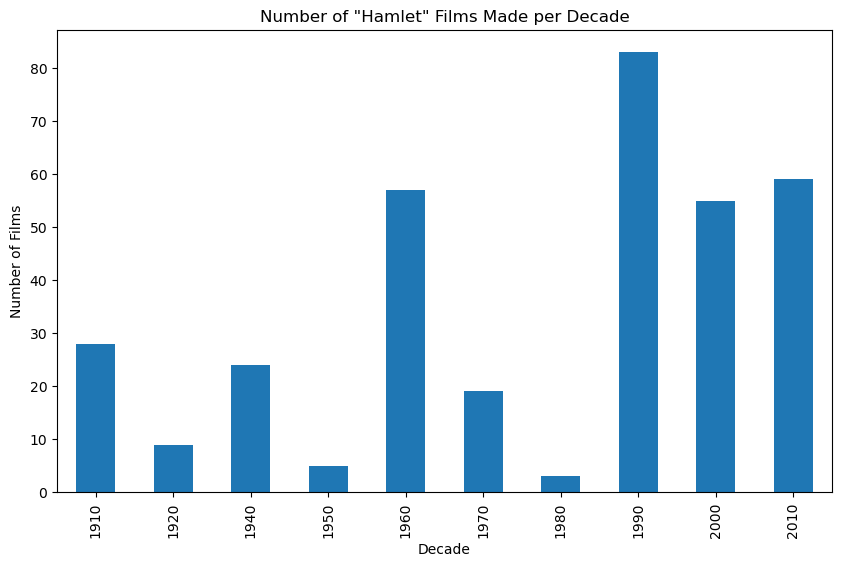

In [63]:
import matplotlib.pyplot as plt

# Filter the DataFrame for "Hamlet" films
hamlet_films = cast[cast['title'] == 'Hamlet']

# Extract the decade from the 'year' column
hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

# Group the films by decade and count the number of films
films_per_decade = hamlet_films.groupby('decade').size()

# Plot the number of "Hamlet" films per decade
films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of "Hamlet" Films Made per Decade')
plt.show()

            

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [64]:
leading_roles_1960s = cast[(cast['year'] >= 1960) & (cast['year'] <= 1969) & (cast['n'] == 1)]
count_1960s = len(leading_roles_1960s)

print("Number of leading roles available in the 1960s:", count_1960s)


Number of leading roles available in the 1960s: 11823


In [65]:
leading_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n'] == 1)]
count_2000s = len(leading_roles_2000s)

print("Number of leading roles available in the 2000s:", count_2000s)


Number of leading roles available in the 2000s: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [66]:
# Filter the DataFrame for Frank Oz's roles
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by year and title, and count the unique roles
films_multiple_roles = frank_oz_roles.groupby(['year', 'title']).size()
films_multiple_roles = films_multiple_roles[films_multiple_roles > 1]

# Print the films with multiple roles played by Frank Oz in chronological order
for index, count in films_multiple_roles.items():
    year, title = index
    print(f"Year: {year}, Title: {title}, Number of Roles: {count}")


Year: 1979, Title: The Muppet Movie, Number of Roles: 8
Year: 1981, Title: An American Werewolf in London, Number of Roles: 2
Year: 1981, Title: The Great Muppet Caper, Number of Roles: 6
Year: 1982, Title: The Dark Crystal, Number of Roles: 2
Year: 1984, Title: The Muppets Take Manhattan, Number of Roles: 7
Year: 1985, Title: Follow That Bird, Number of Roles: 3
Year: 1992, Title: The Muppet Christmas Carol, Number of Roles: 7
Year: 1996, Title: Muppet Treasure Island, Number of Roles: 4
Year: 1999, Title: Muppets from Space, Number of Roles: 4
Year: 1999, Title: The Adventures of Elmo in Grouchland, Number of Roles: 3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [67]:
# Filter the DataFrame for Frank Oz's roles
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by character and count the occurrences
character_counts = frank_oz_roles['character'].value_counts()
characters_at_least_twice = character_counts[character_counts >= 2]

# Print the characters portrayed by Frank Oz at least twice
for character, count in characters_at_least_twice.items():
    print(f"Character: {character}, Number of Appearances: {count}")


Character: Miss Piggy, Number of Appearances: 6
Character: Yoda, Number of Appearances: 6
Character: Animal, Number of Appearances: 6
Character: Cookie Monster, Number of Appearances: 5
Character: Sam the Eagle, Number of Appearances: 5
Character: Fozzie Bear, Number of Appearances: 4
Character: Bert, Number of Appearances: 3
Character: Grover, Number of Appearances: 2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: >

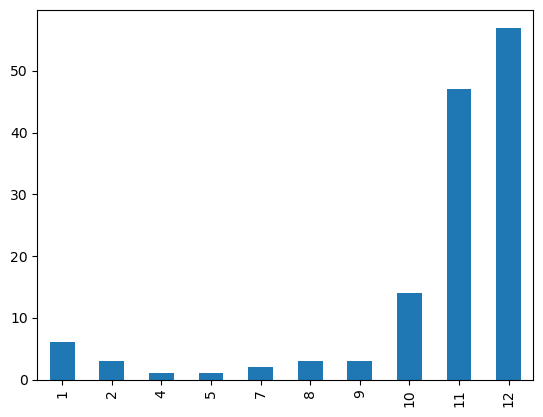

In [68]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/377356228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_movies_usa['month'] = pd.to_datetime(summer_movies_usa['date']).dt.month


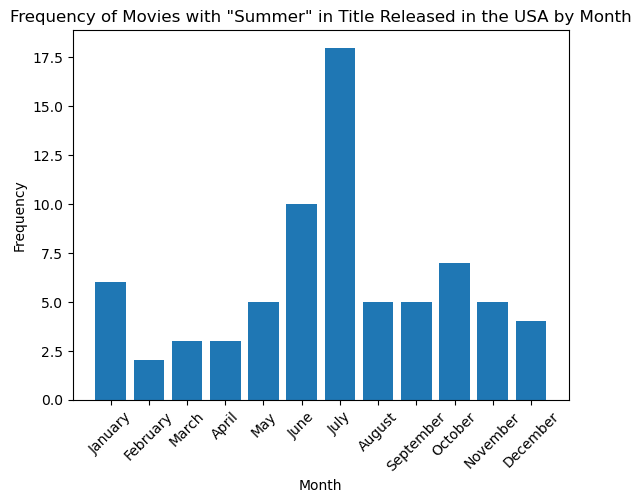

,title,year,country,date,month
288,(500) Days of Summer,2009,USA,2009-08-07,8
6218,A Bad Summer for Tomatoes,2016,USA,2016-12-15,12
8300,A Horse for Summer,2015,USA,2015-01-06,1
9155,A Midsummer Night's Dream,1935,USA,1935-10-30,10
9167,A Midsummer Night's Dream,1999,USA,1999-05-14,5
...,...,...,...,...,...
422223,The Summerset Sisters,1981,USA,2017-12-15,12
429527,The Wine of Summer,2013,USA,2015-10-06,10
430440,The Wordplay Shakespeare a Midsummer Night's D...,2014,USA,2014-09-01,9
436862,To Protect and Serve: A Midsummer Nightmare,2017,USA,2017-03-20,3


In [74]:
import matplotlib.pyplot as plt

# Filter the DataFrame for movies with "Summer" in their title released in the USA
summer_movies_usa = release_dates[(release_dates['title'].str.contains('Summer', case=False)) & (release_dates.country == 'USA')]

# Extract the month from the 'date' column
summer_movies_usa['month'] = pd.to_datetime(summer_movies_usa['date']).dt.month

# Count the frequency of movies by month
movies_by_month = summer_movies_usa['month'].value_counts().sort_index()

# Plot the frequency of movies by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.bar(months, movies_by_month)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Movies with "Summer" in Title Released in the USA by Month')
plt.xticks(rotation=45)
plt.show()

summer_movies_usa


### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/3521896033.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  action_movies_usa['week'] = pd.to_datetime(action_movies_usa['date']).dt.week
/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/3521896033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_movies_usa['week'] = pd.to_datetime(action_movies_usa['date']).dt.week


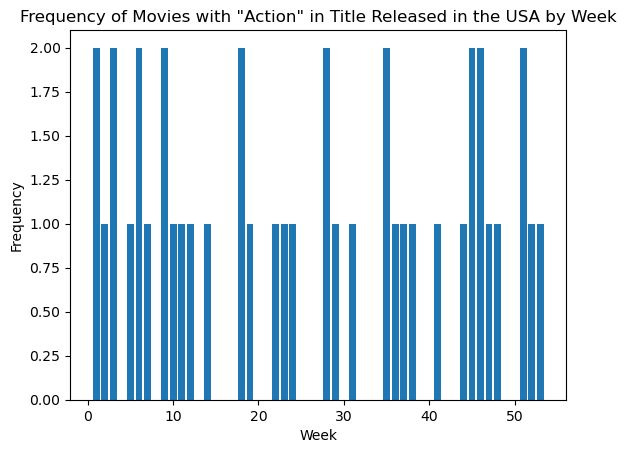

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for movies with "Action" in their title released in the USA
action_movies_usa = release_dates[(release_dates['title'].str.contains('Action', case=False)) & (release_dates['country'] == 'USA')]

# Extract the week from the 'date' column
action_movies_usa['week'] = pd.to_datetime(action_movies_usa['date']).dt.week

# Count the frequency of movies by week
movies_by_week = action_movies_usa['week'].value_counts().sort_index()

# Plot the frequency of movies by week
plt.bar(movies_by_week.index, movies_by_week.values)
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Frequency of Movies with "Action" in Title Released in the USA by Week')
plt.show()


### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [78]:
 # Filter the cast DataFrame for Keanu Reeves' lead roles
keanu_lead_roles = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]

# Merge the keanu_lead_roles DataFrame with the movies DataFrame on the movie's title
movies_keanu_lead = pd.merge(keanu_lead_roles, release_dates, on='title', how='inner')

# Filter the merged DataFrame for movies released in the USA
movies_usa = movies_keanu_lead[movies_keanu_lead['country'] == 'USA']

# Sort the DataFrame by the release date
movies_usa_sorted = movies_usa.sort_values('date')

# Print the movies in which Keanu Reeves played the lead role, along with their release dates in the USA
for index, row in movies_usa_sorted.iterrows():
    print(f"Title: {row['title']}, Release Date: {row['date']}")


Title: Speed, Release Date: 1922-10-22 00:00:00
Title: Speed, Release Date: 1936-05-08 00:00:00
Title: Sweet November, Release Date: 1968-02-08 00:00:00
Title: The Night Before, Release Date: 1988-04-15 00:00:00
Title: Bill & Ted's Excellent Adventure, Release Date: 1989-02-17 00:00:00
Title: Bill & Ted's Bogus Journey, Release Date: 1991-07-19 00:00:00
Title: Little Buddha, Release Date: 1994-05-25 00:00:00
Title: Speed, Release Date: 1994-06-10 00:00:00
Title: Johnny Mnemonic, Release Date: 1995-05-26 00:00:00
Title: A Walk in the Clouds, Release Date: 1995-08-11 00:00:00
Title: Chain Reaction, Release Date: 1996-08-02 00:00:00
Title: Feeling Minnesota, Release Date: 1996-09-13 00:00:00
Title: The Devil's Advocate, Release Date: 1997-10-17 00:00:00
Title: The Matrix, Release Date: 1999-03-31 00:00:00
Title: The Replacements, Release Date: 2000-08-11 00:00:00
Title: Sweet November, Release Date: 2001-02-16 00:00:00
Title: Hard Ball, Release Date: 2001-09-14 00:00:00
Title: Constantine

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/3930266481.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keanu_movies_usa['month'] = pd.to_datetime(keanu_movies_usa['date']).dt.month


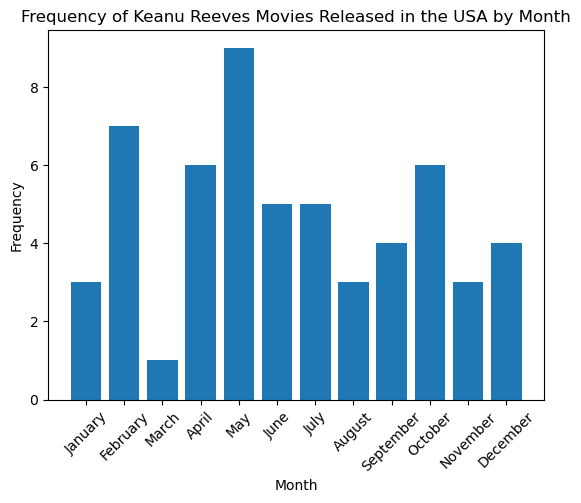

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for Keanu Reeves' roles
keanu_roles = cast[cast['name'] == 'Keanu Reeves']

# Merge the 'keanu_roles' DataFrame with the 'movies' DataFrame based on the movie's title
keanu_movies = pd.merge(keanu_roles, release_dates, on='title', how='inner')

# Filter the merged DataFrame for movies released in the USA
keanu_movies_usa = keanu_movies[keanu_movies['country'] == 'USA']

# Extract the month from the release date
keanu_movies_usa['month'] = pd.to_datetime(keanu_movies_usa['date']).dt.month

# Count the frequency of movies by month
movies_by_month = keanu_movies_usa['month'].value_counts().sort_index()

# Plot the frequency of movies by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.bar(months, movies_by_month)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Keanu Reeves Movies Released in the USA by Month')
plt.xticks(rotation=45)
plt.show()


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

/var/folders/vc/0vcstvcx6pvft0k7hwm6kfn00000gp/T/ipykernel_5997/2786183235.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mckellen_movies_usa['year'] = pd.to_datetime(mckellen_movies_usa['date']).dt.year


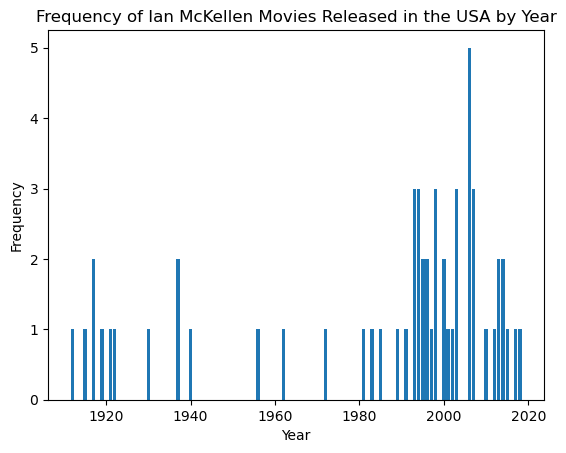

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the 'cast' DataFrame for Ian McKellen's roles
mckellen_roles = cast[cast['name'] == 'Ian McKellen']

# Merge the 'mckellen_roles' DataFrame with the 'movies' DataFrame based on the movie's title
mckellen_movies = pd.merge(mckellen_roles, release_dates, on='title', how='inner')

# Filter the merged DataFrame for movies released in the USA
mckellen_movies_usa = mckellen_movies[mckellen_movies['country'] == 'USA']

# Extract the year from the release date
mckellen_movies_usa['year'] = pd.to_datetime(mckellen_movies_usa['date']).dt.year

# Count the frequency of movies by year
movies_by_year = mckellen_movies_usa['year'].value_counts().sort_index()

# Plot the frequency of movies by year
plt.bar(movies_by_year.index, movies_by_year.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Ian McKellen Movies Released in the USA by Year')
plt.show()
